In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

from scipy.linalg import eigh, norm

# "Assignment" lattice

In this notebook, we diagonalize the real-space hamiltonian of the double-comb model in figure. This model is a three-partite lattice and, due to simmetry exchange of $A$ and $C$ lattice, we can predict the existence of a flat band in its spectrum.

In [286]:
N = 200 #number of primitive cells
n = 3*N #number of points

# On-site energies
eps_a = eps_c = 4.
eps_b = 0.

# Hopping terms
t_bb = 1
t_ab = 2
t_bc = 2

Here, we construct the real-space Hamiltonian under periodic boundary conditions.

In [287]:
H = np.diag([eps_a/2,eps_b/2,eps_c/2]*N)
H += np.diag([-t_ab,-t_bc,0]*(N-1) + [-t_ab,-t_bc],k=1)
H += np.diag([0,-t_bb,0]*(N-1),k=3)

H[1,n-2] -= t_bb

H += np.conjugate(H.transpose())

We diagonalize it. We get two spurious states localized at the "boundaries" of the lattice. After further investigations, this has been attributed to a numerical errors. Those states do not give any effect if the atom is put in the middle of the chain, as they're highly localized. 

In [288]:
eigvals, eigvect = eigh(H)

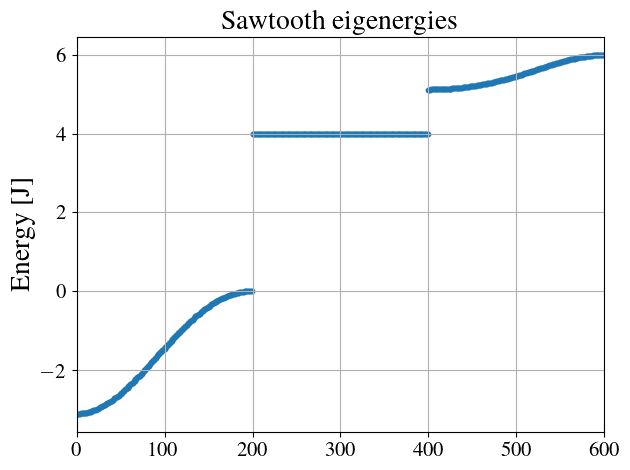

In [289]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

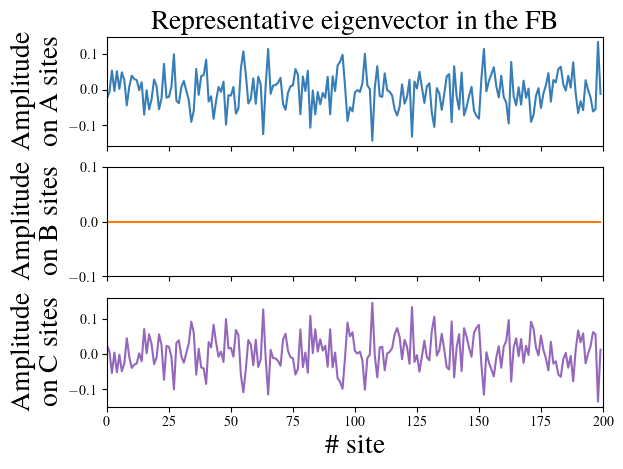

In [290]:
fig, ax = plt.subplots(nrows=3,ncols=1,sharex=True)

s = 300
ax[0].plot(eigvect[::3,s],color="#377eb8")
ax[1].plot(eigvect[1::3,s],color='#ff7f00')
ax[2].plot(eigvect[2::3,s],color='C4')

ax[0].set_title("Representative eigenvector in the FB",fontsize=20)
ax[2].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)
ax[2].set_ylabel("Amplitude \n on C sites",fontsize=20)

ax[2].set_xlim(0,N)
ax[1].set_ylim(-0.1,0.1)

#plt.savefig("eig_FB.pdf")
plt.show()

# Analytics

In [244]:
def upp_db(eps_a,t_bb,t_ab,t_bc,N=1000):
    
    temp = eps_a/2*np.ones(N) - t_bb*np.cos(t)
    temp += 0.5*np.sqrt((eps_a*np.ones(N) + 2*t_bb*np.cos(t))**2 + t_ab**2 + t_bc**2)
    
    return temp

In [245]:
def low_db(eps_a,t_bb,t_ab,t_bc,N=1000):
    
    temp = eps_a/2*np.ones(N) - t_bb*np.cos(t)
    temp -= 0.5*np.sqrt((eps_a*np.ones(N) + 2*t_bb*np.cos(t))**2 + t_ab**2 + t_bc**2)
    
    return temp

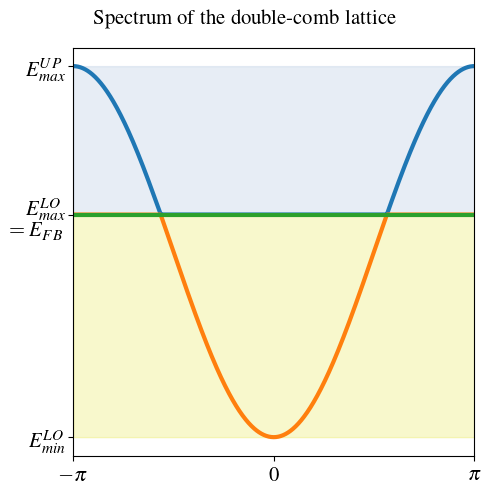

In [253]:
fig = plt.figure(figsize=(5,5),tight_layout=0)

t = np.linspace(-np.pi,np.pi,1000,endpoint=True)
plt.suptitle("Spectrum of the double-comb lattice",fontsize=15)

plt.plot(t,upp_db(eps_a,t_bb,t_ab,t_bc),lw=3)
plt.plot(t,low_db(eps_a,t_bb,t_ab,t_bc),lw=3)
plt.plot(t,eps_a*np.ones(1000),lw=3)


up_min = np.min(upp_db(eps_a,t_bb,t_ab,t_bc))
up_max = np.max(upp_db(eps_a,t_bb,t_ab,t_bc))
lo_min = np.min(low_db(eps_a,t_bb,t_ab,t_bc))
lo_max = np.max(low_db(eps_a,t_bb,t_ab,t_bc))
plt.fill_between(t,up_min,up_max,color="lightsteelblue",alpha=0.3)
plt.fill_between(t,lo_min,lo_max,color="#dede00",alpha=0.2)

plt.xlim(-np.pi,np.pi)

plt.xticks([-np.pi,0,np.pi],[f"$-\pi$",f"$0$",f"$\pi$"],fontsize=15)
plt.yticks([lo_min,eps_a,up_max],["$E^{LO}_{min}$","$E^{LO}_{max}$" + "\n" + "$= E_{FB}$",
                                 "$E^{UP}_{max}$"],fontsize=15)


plt.savefig("spectra/overlap.png")
plt.show()

(array([499, 500], dtype=int64),)